# Final Project 4 

Group 3 :
- Jasmine Nur Ramadhani (PYTN-KS20-016)
- Faizal Azmi Nurwardani (PYTN-KS20-020)
- Afifah Yulfahazani (PYTN-KS20-07)

## Project Overview

Sumber data: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

Dataset ini berisikan catatan dari 8950 orang dengan 18 atribut (saldo, pembelian, kredit limit, dan lainnya). Data ini diperlukan untuk pengembangan segmentasi nasabah atau konsumen dengan memahami perilaku konsumen untuk menentukan strategi pemasaran nantinya.

Berikut informasi dari masing-masing atribut:

1. CUST_ID - Identification of Credit Card holder (Categorical)
 2. BALANCE - Balance amount left in their account to make purchases  
3. BALANCE_FREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
4. PURCHASES - Amount of purchases made from account 
5. ONEOFF_PURCHASES - Maximum purchase amount done in one-go 
6. INSTALLMENTS_PURCHASES - Amount of purchase done in installment 
7. CASH_ADVANCE - Cash in advance given by the user 
8. PURCHASES_FREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 
9. ONEOFF_PURCHASES_FREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
10. PURCHASES_INSTALLMENTS_FREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
11. CASH_ADVANCE_FREQUENCY - How frequently the cash in advance being paid 
12. CASH_ADVANCE_TRX - Number of Transactions made with "Cash in Advance" 
13. PURCHASES_TRX - Number of purchase transactions made 
14. CREDIT_LIMIT - Limit of Credit Card for user 
15. PAYMENTS - Amount of Payment done by user 
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user 
17. PRC_FULL_PAYMENT - Percent of full payment paid by user 
18. TENURE - Tenure of credit card service for user


Project ini bertujuan untuk mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan


# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import DBSCAN

import pickle
import warnings
warnings.filterwarnings('ignore')

# Data Loading

## Import data

In [2]:
df = pd.read_csv(r'CC GENERAL.csv')

## Detail of dataset

In [3]:
print("Baris : ", df.shape[0])  # ukuran baris
print("Kolom : ", df.shape[1])  # ukuran kolom

Baris :  8950
Kolom :  18


Dataset memiliki 8950 baris dan 18 fitur/kolom, yang dapat dilihat di bawah ini: 

In [4]:
# Menampilkan 5 baris teratas 
pd.set_option("display.max.columns", None)     # Displaying maximum column
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Menampilkan 5 baris terbawah 
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [6]:
# Menampilkan fitur-fitur pada dataset
column_names = df.columns
column_names

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Fitur-fitur yang ada pada dataset ini adalah `'CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'`

In [7]:
# Menampilkan informasi (tipe data dan jumlah non-null) untuk tiap fitur
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Berdasarkan informasi-informasi yang telah didapatkan di atas, dapat diketahui bahwa data yang digunakan terdiri dari 8950 baris dan 18 kolom. 

Tipe data yang terdapat dalam data ini adalah 17 kolom yang memiliki tipe data numerik dan 1 kolom yang memiliki tipe data object.
Selain itu, dapat dilihat pada bagian Non-null count bahwa hanya kolom 'CREDIT_LIMIT' dan 'MINIMUM_PAYMENTS' yang tidak seluruh barisnya non-null.

Dengan begitu, pada proses selanjutnya akan dilakukan pembersihan data (data cleaning).

In [8]:
for each_feature in df:
   unique_values = len(df[each_feature].unique())
   print("Cardinality of {} are: {}".format(each_feature, unique_values))

Cardinality of CUST_ID are: 8950
Cardinality of BALANCE are: 8871
Cardinality of BALANCE_FREQUENCY are: 43
Cardinality of PURCHASES are: 6203
Cardinality of ONEOFF_PURCHASES are: 4014
Cardinality of INSTALLMENTS_PURCHASES are: 4452
Cardinality of CASH_ADVANCE are: 4323
Cardinality of PURCHASES_FREQUENCY are: 47
Cardinality of ONEOFF_PURCHASES_FREQUENCY are: 47
Cardinality of PURCHASES_INSTALLMENTS_FREQUENCY are: 47
Cardinality of CASH_ADVANCE_FREQUENCY are: 54
Cardinality of CASH_ADVANCE_TRX are: 65
Cardinality of PURCHASES_TRX are: 173
Cardinality of CREDIT_LIMIT are: 206
Cardinality of PAYMENTS are: 8711
Cardinality of MINIMUM_PAYMENTS are: 8637
Cardinality of PRC_FULL_PAYMENT are: 47
Cardinality of TENURE are: 7


# Data Cleaning

In [9]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
print("Kardinalitas dari CUST_ID adalah: ", len((df['CUST_ID'].unique())))

Kardinalitas dari CUST_ID adalah:  8950


Karena fitur 'CUST_ID' adalah fitur berfungsi sebagai pengidentifikasi atau label untuk setiap pemegang kartu kredit dan tidak membawa informasi yang berarti untuk clustering maka akan di-drop.

Setelah itu, akan dilakukan pengecekan apakah ada missing value atau tidak

In [11]:
df.drop('CUST_ID',axis=1,inplace=True)

In [12]:
# Cek untuk missing values
df.isnull().values.any()

True

Terdapat missing values dalam dataset.

Kemudian cek apakah terdapat data duplikat atau tidak

In [13]:
# Cek untuk data duplikat
df.duplicated().sum()

0

Tidak terdapat data duplikat pada dataset.

Karena terdapat missing values maka selanjutnya akan dicek jumlah missing values untuk setiap kolom/fitur.

In [14]:
# Cek untuk missing values
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat 313 missing values pada fitur 'MINIMUM_PAYMENTS' dan 1 missing value pada 'CREDIT_LIMIT'.

Karena 'CREDIT_LIMIT' hanya terdapat satu missing value maka akan di-dropna

In [15]:
df.dropna(subset = ['CREDIT_LIMIT'], inplace=True)
print("Jumlah missing value pada 'CREDIT_LIMIT' adalah", df['CREDIT_LIMIT'].isnull().sum())

Jumlah missing value pada 'CREDIT_LIMIT' adalah 0


Selanjutnya, missing value pada fitur 'MINIMUM_PAYMENTS' akan diisi dengan Machine Learning-based Imputation dengan KNNImputer. Meskipun lebih kompleks dalam proses imputasinya karena perlu memprediksi missing value berdasarkan fitur-fitur lainnya, akan tetapi memungkinkan hasil imputasi yang lebih akurat.

In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df[['MINIMUM_PAYMENTS']])

In [17]:
df.dropna(subset = ['MINIMUM_PAYMENTS'], inplace=True)
print("Jumlah missing value pada 'MINIMUM_PAYMENTS' adalah", df['MINIMUM_PAYMENTS'].isnull().sum())

Jumlah missing value pada 'MINIMUM_PAYMENTS' adalah 0


Dengan demikian, proses data cleaning telah selesai.

# Explanatory Data Analysis (EDA)

## Measure of Tendency & Variability

In [18]:
# Menampilkan statistik deskriptif data dengan tipe numerik
desc_df = df.describe()
desc_df.T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.000000,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.000000,39.800000,361.490000,1110.170000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.000000,0.000000,38.000000,577.830000,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.000000,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.000000,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.000000,0.000000,0.000000,0.222222,1.50000


In [19]:
import pandas as pd

# Measure of Tendency
central_tendency = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Mode': df.mode().iloc[0],
})

# Measure of Variability
variability = pd.DataFrame({
    'Variance': df.var(),
    'Std Dev': df.std(),
    'IQR': df.quantile(0.75) - df.quantile(0.25),
    'Range': df.max() - df.min(),
    'CV': (df.std() / df.mean()) * 100,     # The coefficient of variation (CV)
})

# Combine the two DataFrames
measures_df = pd.concat([central_tendency, variability], axis=1)

# Display the DataFrame
measures_df

,Mean,Median,Mode,Variance,Std Dev,IQR,Range,CV
BALANCE,1564.647593,873.680279,0.000000,4.332992e+06,2081.584016,1926.007066,19043.138560,133.038521
BALANCE_FREQUENCY,0.877350,1.000000,1.000000,5.607334e-02,0.236798,0.111111,1.000000,26.990148
PURCHASES,1003.316936,361.490000,0.000000,4.565606e+06,2136.727848,1070.370000,49039.570000,212.966389
ONEOFF_PURCHASES,592.503572,38.000000,0.000000,2.755497e+06,1659.968851,577.830000,40761.250000,280.161830
INSTALLMENTS_PURCHASES,411.113579,89.000000,0.000000,8.178999e+05,904.378205,468.650000,22500.000000,219.982567
CASH_ADVANCE,978.959616,0.000000,0.000000,4.398518e+06,2097.264344,1113.868654,47137.211760,214.234000
PURCHASES_FREQUENCY,0.490405,0.500000,1.000000,1.610896e-01,0.401360,0.833334,1.000000,81.842440
ONEOFF_PURCHASES_FREQUENCY,0.202480,0.083333,0.000000,8.900977e-02,0.298345,0.300000,1.000000,147.345222
PURCHASES_INSTALLMENTS_FREQUENCY,0.364478,0.166667,0.000000,1.579675e-01,0.397451,0.750000,1.000000,109.046703
CASH_ADVANCE_FREQUENCY,0.135141,0.000000,0.000000,4.005293e-02,0.200132,0.222222,1.500000,148.091823


Berikut dapat dilihat pada dataframe di atas untuk mean, median, mode, varians, standar deviasi, IQR, range, dan koefisien variasi.

Diketahui bahwa:
- Saldo (BALANCE) rata-rata adalah 1564.647593
- Pembelian (PURCHASES) terbesar adalah 49039.57000
- TENURE yang paling sering muncul adalah 12
- Kredit limit (CREDIT_LIMIT) minimum adalah 50 dan maksimum 30000

## Distribution

Pada bagian ini, akan dilihat distribusi dari setiap fitur/atribut dalam visualisasi histogram:

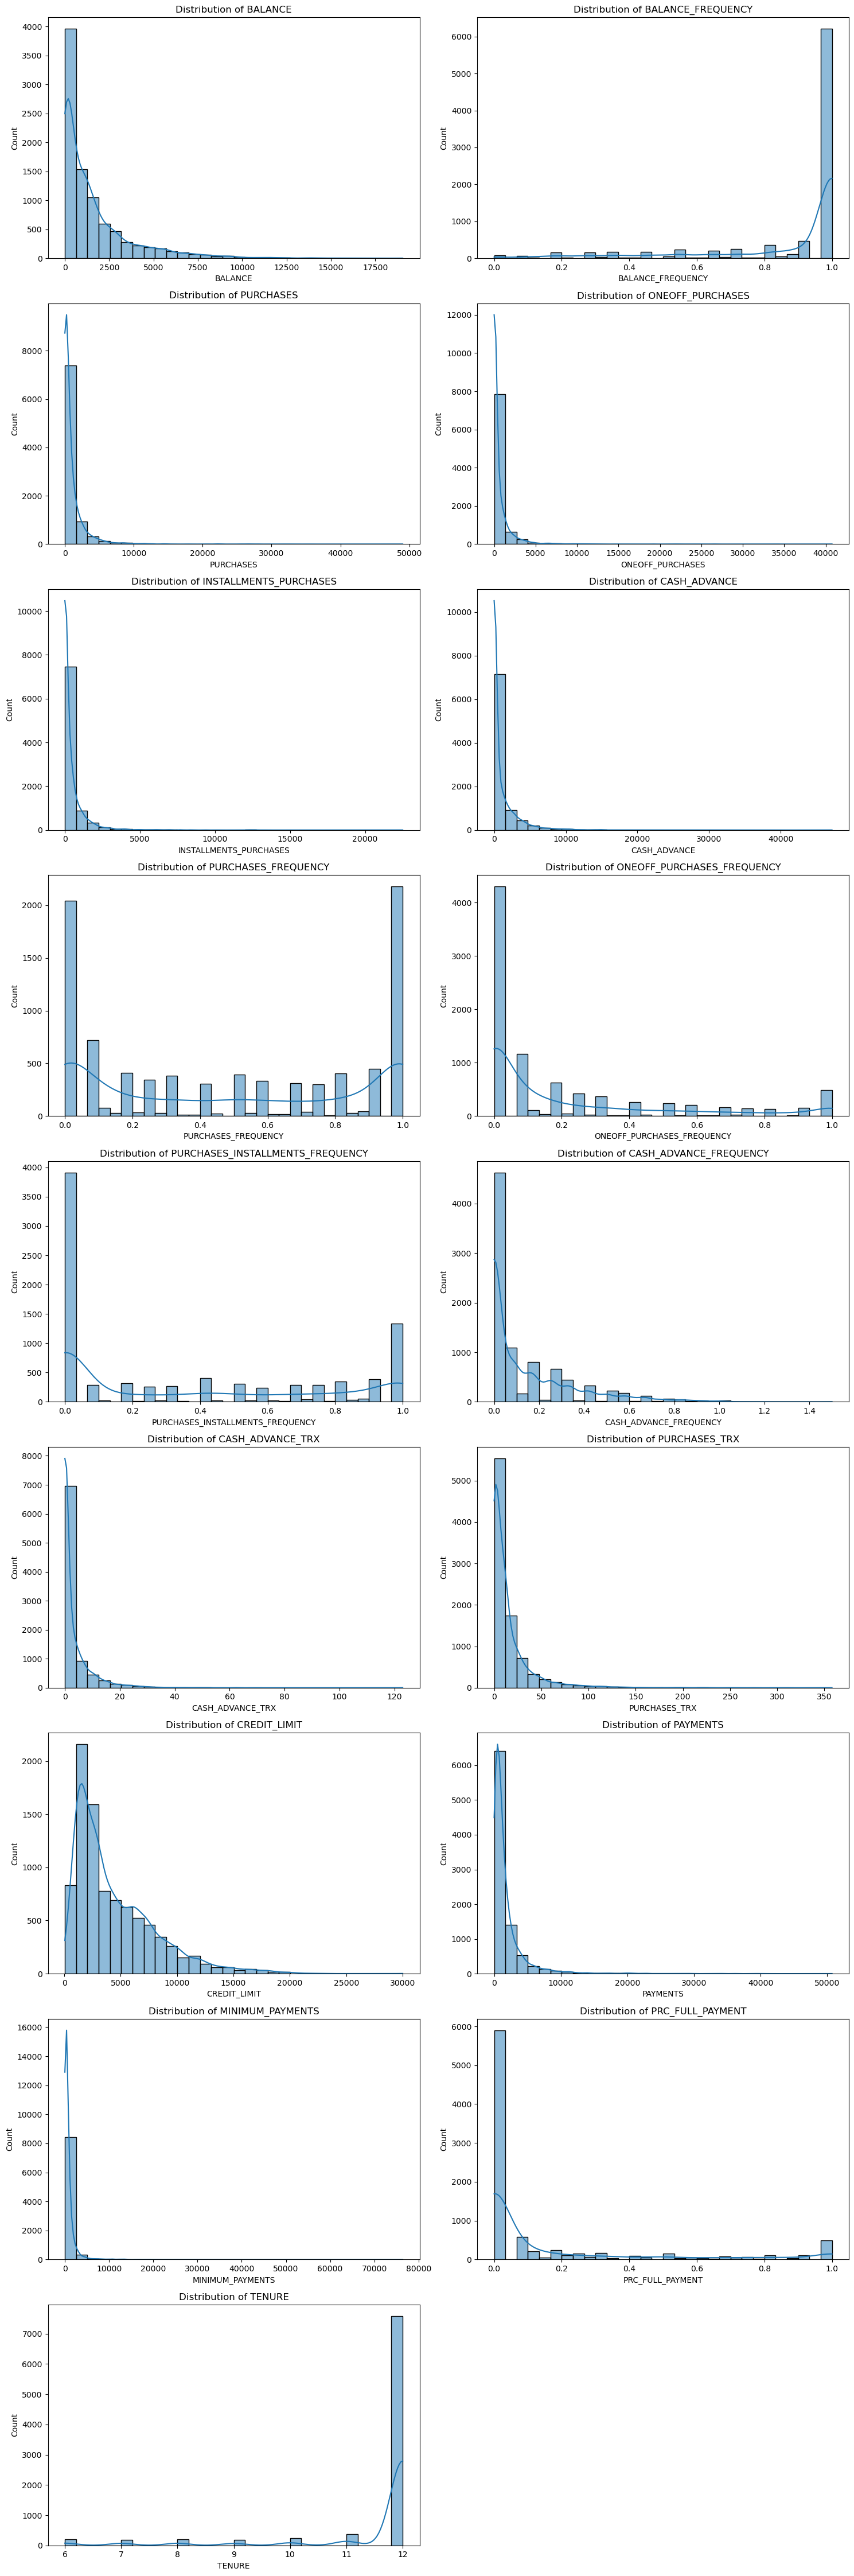

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

df = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
           'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
           'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
           'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
           'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
           'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

# Create subplots
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Ensure at least 2 columns in the plot
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(df.columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# If the number of features is odd, remove the last empty subplot
if num_cols % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


Seperti yang diketahui dari measure of tendency pada visualisasi histogram di atas fitur TENURE (seberapa lama pelanggan biasanya mempertahankan layanan kartu kredit mereka) berdistribusi lebih tinggi di 12 bulan.

## Balance vs Credit Limit

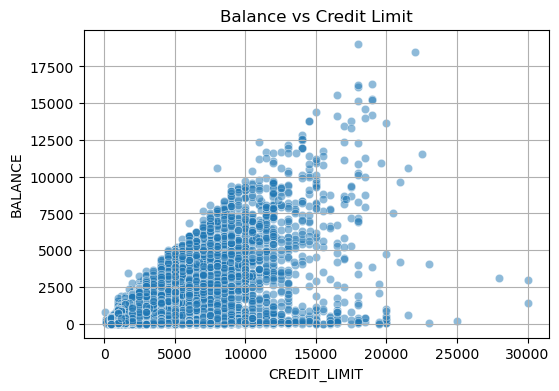

In [21]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='BALANCE', alpha=0.5)
plt.title('Balance vs Credit Limit')
plt.grid(True)
plt.show()

Ketika persebaran credit limit ke kanan (bertambah), persebaran balance (saldo) juga menaik maka antara kedua fitur ini memiliki hubungan yang berkorelasi positif.

## Correlation Matrix

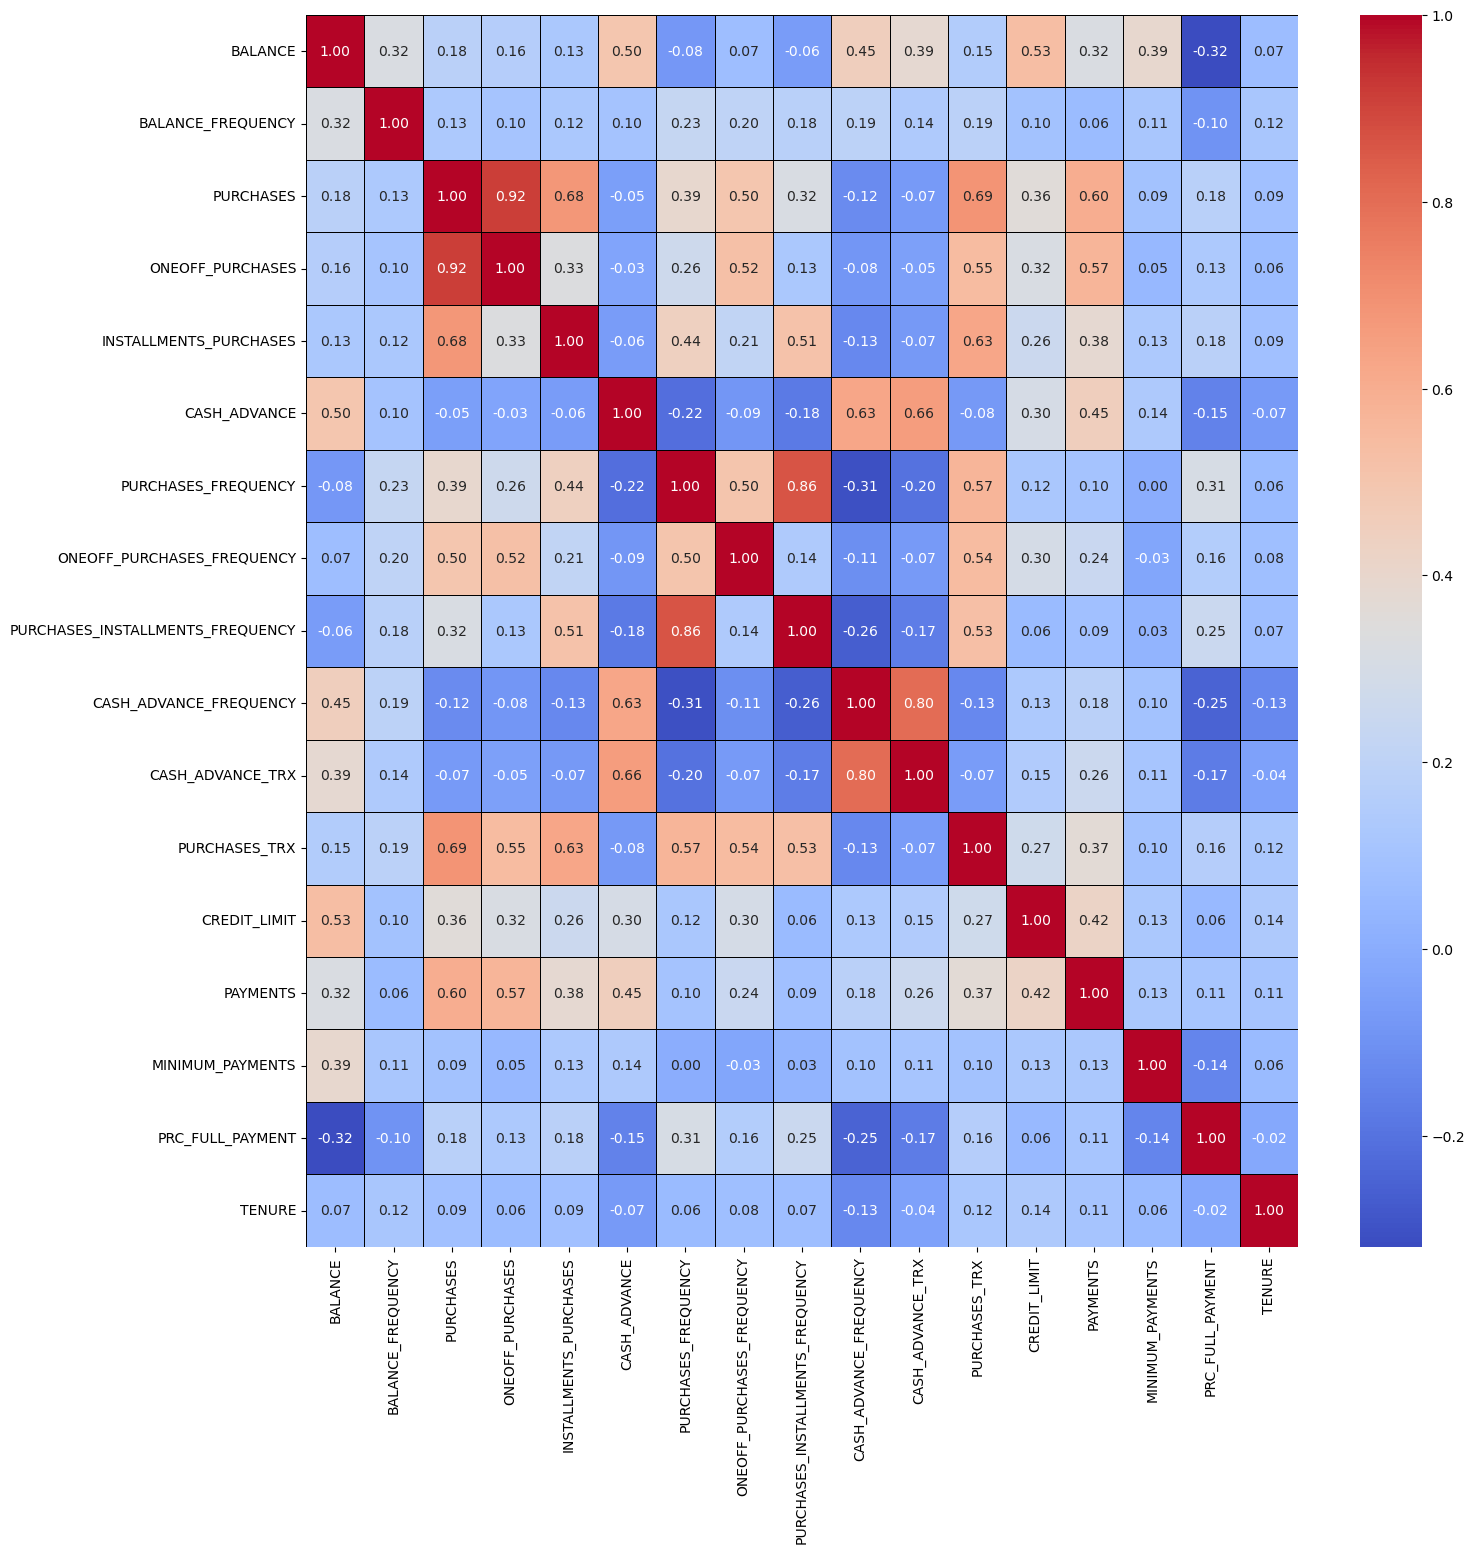

In [22]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidth=0.5, linecolor="Black", cmap="coolwarm")
plt.show()

Seperti yang dapat dilihat dari heatmap correation matrix di atas, 
- fitur `'PURCHASES'` dan `'ONEOFF_PURCHASES'` memiliki korelasi yang tinggi dengan koefisien 0.92

# Data Preprocessing

Selanjutnya dilakukan standarisasi atau normalisasi fitur-fitur numerik penting dalam pengelompokan karena memastikan bahwa semua fitur berkontribusi sama terhadap perhitungan berbasis jarak yang dilakukan oleh algoritma clustering.

In [23]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Standarisasi dilakukan dengan `StandardScaler`

In [24]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform all numerical columns
df_standardized = scaler.fit_transform(df)

In [25]:
# After standardized
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)
df_standardized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-3.109947e-01,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,8.926366e-02,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-1.017005e-01,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,4.878069e-17,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-2.658206e-01,-0.525588,0.360541


# Model Definition & Implementing Model

## K-Means Clustering

Pertama akan dipilih jumlah kluster (k). Teknik yang digunakan untuk menentukan nilai optimal untuk k adalah `silhouette_score`.

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters (k)
silhouette_scores = []
k_values = range(2, 11)         # giving range for k value 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_standardized)
    km_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_standardized, km_labels))


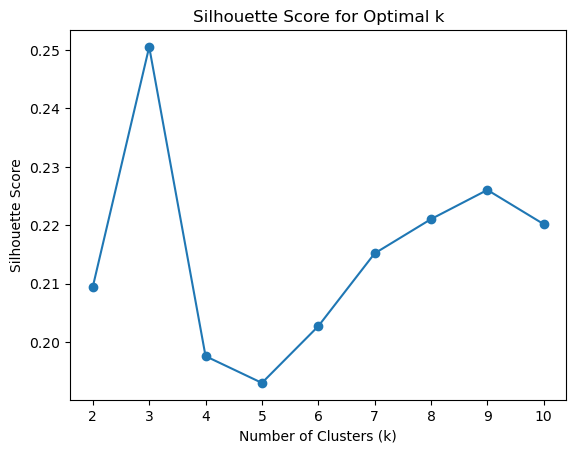

Number of Clusters (k): 3


In [27]:
# Plot Silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal k (e.g., the one with the highest silhouette score)
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Number of Clusters (k):", optimal_k)


Karena nilai cluster dengan silhouette score tertinggi adalah 3 maka banyaknya cluster (k) yang digunakan adalah 3.

In [28]:
# Apply KMeans with the optimal k
final_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
final_clusters = final_kmeans.fit_predict(df_standardized)

# Add cluster assignments as a new feature to the original dataset
df_km_clusters = df.copy() 
df_km_clusters['Cluster_KMeans_Label'] = final_clusters

# Display the resulting DataFrame
df_km_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_KMeans_Label
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


Ketiga cluster K-Means ditambahkan menjadi fitur baru dalam `df_km_clusters`, yaitu fitur `'Cluster_KMeans_Label'` yang berisikan antara 0, 1, atau 2.

Setelah fitur cluster ditambahkan ke dalam dataframe maka selanjutnya kita akan memberikan label atau keterangan dari masing-masing cluster

In [29]:
df_km_clusters['Cluster_KMeans'] = final_clusters

# Map cluster labels to meaningful names
cluster_kmeans = {0: "High-Spending, Frequent Purchasers",
                    1: "Low-Spending, Infrequent Purchasers",
                    2: "Moderate-Spending, Moderate Purchasers"}

df_km_clusters['Cluster_KMeans'] = df_km_clusters['Cluster_KMeans'].map(cluster_kmeans)

# Display the resulting DataFrame
df_km_clusters.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_KMeans_Label,Cluster_KMeans
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1,"Low-Spending, Infrequent Purchasers"
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,"Moderate-Spending, Moderate Purchasers"
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1,"Low-Spending, Infrequent Purchasers"


Setelah penentuan banyak cluster (k) dengan algoritma K-Means, fitur baru, yaitu `'Cluster_KMeans'` (kolom yang menunjukkan penempatan cluster untuk setiap data) ditambahkan ke dalam dataframe yang digunakan.

Pelabelan cluster adalah sebagai berikut:
- Cluster 0: High-Spending, Frequent Purchasers
    - Deskripsi: Nasabah ini memiliki saldo (balance) yang tinggi, sering melakukan pembelian (frequent purchases), dan mereka mungkin lebih cenderung menggunakan kartu kreditnya untuk digunakan dalam berbagai transaksi.

- Cluster 1: "Low-Spending, Infrequent Purchasers"
    - Deskripsi: Nasabah ini memiliki saldo yang rendah dan jarang melakukan pembelian, dan mereka mungkin menggunakan kartu kredit mereka dengan lebih konservatif.

- Cluster 2: "Moderate-Spending, Moderate Purchasers"
    - Deskripsi: Nasabah dalam cluster ini termasuk dalam kategori pembelanja tinggi dan rendah. Mereka memiliki saldo yang moderat dan melakukan pembelian dengan frekuensi yang moderat (cenderung tengah).

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [30]:
#import library
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(df_standardized)

# Add the DBSCAN clusters as a new feature to the original dataset
df_dbscan_clusters = df.copy()
df_dbscan_clusters['Cluster_DBSCAN'] = dbscan_clusters

# Display the resulting DataFrame with DBSCAN clusters
df_dbscan_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_DBSCAN
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,-1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,-1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [31]:
# Map cluster labels to meaningful names (if desired)
cluster_mapping = {-1: "Noise", 0: "Cluster 0", 1: "Cluster 1", 2: "Cluster 2", 3: "Cluster 3"}
df_dbscan_clusters['Cluster_DBSCAN'] = df_dbscan_clusters['Cluster_DBSCAN'].map(cluster_mapping)

# Display the resulting DataFrame with meaningful cluster labels
df_dbscan_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_DBSCAN
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,Cluster 0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Noise
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Noise
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12,Noise
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,Cluster 0


# Model Evaluation

## K-Means Clustering

Berikut visualisasi ketiga cluster berdasarkan saldo ('BALANCE') dan pembeliannya ('PURCHASES')

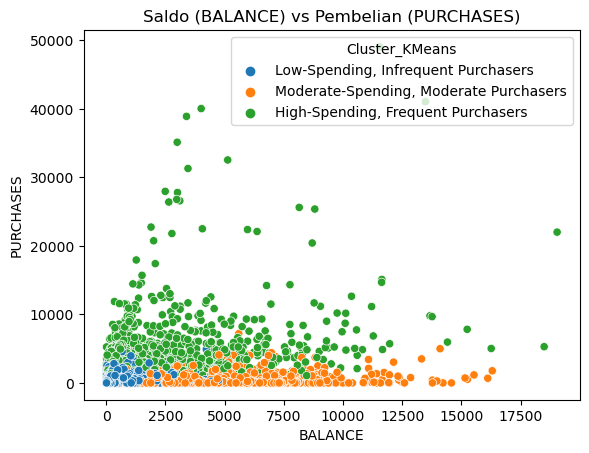

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='BALANCE', y='PURCHASES', hue='Cluster_KMeans', data=df_km_clusters)
plt.title('Saldo (BALANCE) vs Pembelian (PURCHASES)')
plt.show()

Berdasarkan grafik di atas,dapat dilihat bahwa:
- cluster 1 berwarna biru (Low-Spending, Infrequent Purchasers) sebagian besar berada dalam saldo (BALANCE) kurang dari 5000 dan pembelian (PURCHASES) kurang dari 10000
- cluster 0 berwarna hijau (High-Spending, Frequent Purchasers) saldo (BALANCE) berada sampai lebih dari 17500 dan pembelian (PURCHASES) yang dapat mencapai 40000
- cluster 2 berwarna oren (Moderate-Spending, Moderate Purchasers) meskipun saldo (BALANCE) ada yang berada di kirsaran 7500 sampai  kurang dari 17500. Namun, pembelian (PURCHASES) masih berkisaran di 0 sampai 10000

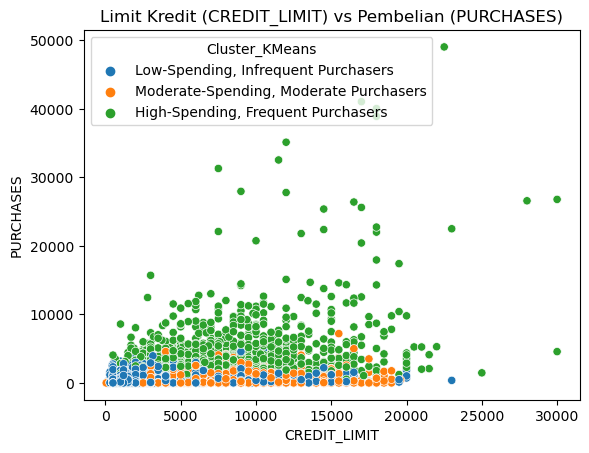

In [33]:
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', hue='Cluster_KMeans', data=df_km_clusters)
plt.title('Limit Kredit (CREDIT_LIMIT) vs Pembelian (PURCHASES)')
plt.show()

cluster 0 (hijau) memiliki pembelian yang lebih besar dibandingkan dengan cluster lainnya dan limit kredit yang juga labih besar

### Cluster profiles

In [34]:
km_cluster_profiles = df_km_clusters.groupby('Cluster_KMeans').mean()
km_cluster_profiles

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_KMeans_Label
Cluster_KMeans,,,,,,,,,,,,,,,,,,
"High-Spending, Frequent Purchasers",2220.003291,0.981477,4268.520980,2717.828543,1551.178267,458.421147,0.949093,0.668166,0.744584,0.063014,1.528745,56.472065,7733.967611,4151.276172,1224.539305,0.298632,11.923077,0.0
"Low-Spending, Infrequent Purchasers",799.898778,0.835293,505.697682,253.202890,252.815694,329.829002,0.465224,0.132377,0.345258,0.068241,1.209743,8.656694,3270.046360,909.973040,548.686606,0.155801,11.480464,1.0
"Moderate-Spending, Moderate Purchasers",3987.067263,0.957917,384.287495,248.562392,135.802542,3867.874441,0.232145,0.110873,0.144152,0.447165,12.390733,5.608641,6679.088632,3017.218082,1794.641783,0.033753,11.348153,2.0


Dapat dilihat dalam kolom 'BALANCE', 'PURCHASES', dan 'CREDIT_LIMIT',
- Cluster 2 (Moderate-Spending, Moderate Purchasers) memiliki rata-rata saldo ('BALANCE') yang paling besar senilai 3987.067263, diikuti dengan cluster 0 (High-Spending, Frequent Purchasers) senilai 2220.003291 dan cluster 1 memiliki rata-rata saldo paling sedikit, yaitu 799.898778.
- Dan pembelian ('PURCHASES'), dengan berurutan cluster 0, cluster 1, kemudian cluster 2 yang paling rendah pembeliannya.
- Dan limit kredit ('CREDIT_LIMIT'), dengan berurutan cluster 0, cluster 2, cluster 1 yang paling sedikit limit kreditnya.

## DBSCAN

Pertama kita akan melihat banyak dari setiap nilai pada df_dbscan_clusters['Cluster_DBSCAN']

In [35]:
df_dbscan_clusters['Cluster_DBSCAN'].value_counts()

Cluster_DBSCAN
Noise        6626
Cluster 0    1698
Cluster 2      34
Cluster 3      11
Cluster 1       8
Name: count, dtype: int64

Pada hasil clustering denganDBSCAN didapatkan: 
- Noise = 6626, 
- Cluster 0 = 1698
- Cluster 2 = 34
- Cluster 3 = 11
- Cluster 1 = 8

### Cluster profiles

In [36]:
# menampilkan profile dari 'Cluster_DBSCAN'
dbscan_cluster_profiles = df_dbscan_clusters.groupby('Cluster_DBSCAN').mean()
dbscan_cluster_profiles

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster_DBSCAN,,,,,,,,,,,,,,,,,
Cluster 0,999.292859,0.995878,202.800866,64.441820,138.445771,272.291081,0.337259,0.041470,0.293041,0.085983,1.415194,5.159600,2260.306243,549.018197,432.435252,0.075531,12.000000
Cluster 1,984.442150,0.875000,0.000000,0.000000,0.000000,1221.011916,0.000000,0.000000,0.000000,0.125000,1.375000,0.000000,1775.000000,400.356012,245.698691,0.000000,8.000000
Cluster 2,20.262235,0.336898,227.378529,46.333235,181.045294,0.000000,0.274510,0.019608,0.237745,0.000000,0.000000,4.117647,2110.392157,559.772607,151.204635,1.000000,12.000000
Cluster 3,49.632927,1.000000,618.156364,0.001818,618.154545,0.000000,0.984849,0.007576,0.962121,0.000000,0.000000,20.000000,7181.818182,604.895422,173.523159,0.992424,12.000000
Noise,1830.402761,0.882083,1283.094396,776.673758,506.792185,1242.747524,0.540860,0.256627,0.389930,0.158767,3.998642,18.063688,5223.569997,2162.153670,1027.201641,0.165566,11.384093


Berdasarkan profile di atas, dapat ditarik kesimpulan bahwa:
- Cluster 0 merupakan konsumen yang memiliki rata-rata saldo ('BALANCE') yang besar, perilaku pembelian yang menengah jika dilihat dari pembelian ('PURCHASES') danfrekuensi pembelian ('PURCHASES_FREQUENCY'), serta rata-rata limit kredit menengah.
- Cluster 1 merupakan konsumen yang memiliki rata-rata saldo sedikit lebih kecil dari cluster 0. Namun, tidak terdapat aktivitas pembelian dan rata-rata limit kredit merupakan yang paling kecil.
- Cluster 2 merupkan konsumen dengan rata-rata saldo ('BALANCE') paling sedikit akan tetapi memiliki pembelian ('PURCHASES') sedikit lebih besar dari cluster 0.
- Cluster 3 merupakan konsumen dengan rata-rata saldo ('BALANCE') satu tingkat di atas cluster 2 akan tetapi memiliki pembelian ('PURCHASES') yang paling besar dibandingkan ketiga cluster sebelumnya, serta memiliki frekuensi pembelian ('PURCHASES_FREQUENCY') yang paling besar. Selain itu, rata-rata limit kredit ('CREDIT_LIMIT') yang paling besar.

### Exploration

In [37]:
# Filter out noise points
df_clusters_no_noise = df_dbscan_clusters[df_dbscan_clusters['Cluster_DBSCAN'] != 'Noise']

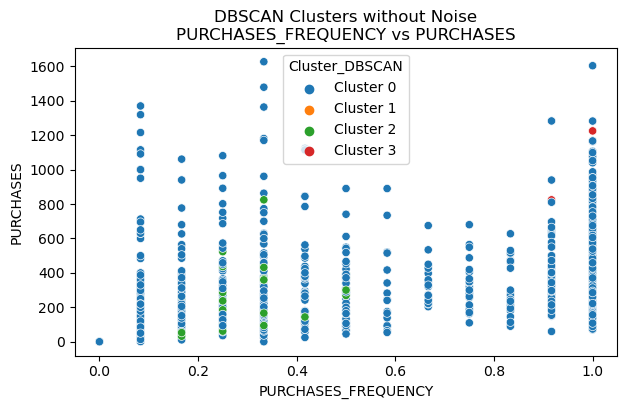

In [38]:
# Plot without noise
plt.figure(figsize=(7,4))

sns.scatterplot(x='PURCHASES_FREQUENCY', y='PURCHASES', hue='Cluster_DBSCAN', data=df_clusters_no_noise)
plt.title('DBSCAN Clusters without Noise\nPURCHASES_FREQUENCY vs PURCHASES')
plt.show()

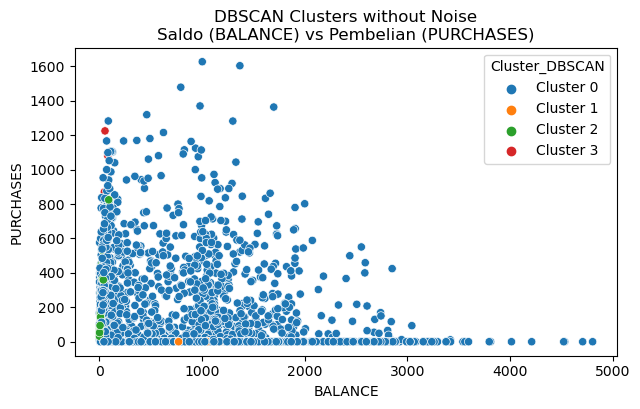

In [39]:
# Scatter plot of two features
plt.figure(figsize=(7,4))

sns.scatterplot(x='BALANCE', y='PURCHASES', hue='Cluster_DBSCAN', data=df_clusters_no_noise)
plt.title('DBSCAN Clusters without Noise\nSaldo (BALANCE) vs Pembelian (PURCHASES)')
plt.show()

Dapat dilihat bahwa baik saldo dan pembelian untuk cluster 0, penyebarannya jauh lebih banyak dan luas dibandingkan cluster lainnya. Hal ini juga dapat dikarenakan jumlah pengguna/nasabah yang jauh lebih banyak jika dibandingkan dengan cluster lainnya.

# Model Inferencing

In [40]:
# final_kmeans' is fitted K-Means model with the optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
final_clusters = final_kmeans.fit_predict(df_standardized)

# Model inference data
model_inference_data = {'BALANCE':[6564.64, 234.435], 'BALANCE_FREQUENCY':[0.4324, 0.0545], 
                   'PURCHASES':[75.65, 657.645], 'ONEOFF_PURCHASES':[654, 677],
                   'INSTALLMENTS_PURCHASES':[75.756, 634.76], 'CASH_ADVANCE':[5747, 433], 
                   'PURCHASES_FREQUENCY':[0.0455, 0.6456],'ONEOFF_PURCHASES_FREQUENCY':[0.0745, 0.0547], 
                   'PURCHASES_INSTALLMENTS_FREQUENCY':[0.04645, 0.3636],'CASH_ADVANCE_FREQUENCY':[0.74, 0.534], 
                   'CASH_ADVANCE_TRX':[7, 3], 'PURCHASES_TRX':[4, 7],
                   'CREDIT_LIMIT':[4534, 656], 'PAYMENTS':[4634, 1234], 'MINIMUM_PAYMENTS':[234, 123], 
                   'PRC_FULL_PAYMENT':[0.542, 0.121],'TENURE':[7, 10]}

model_inference_df = pd.DataFrame(model_inference_data, columns=df_standardized.columns)

model_inference_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6564.640,0.4324,75.650,654,75.756,5747,0.0455,0.0745,0.04645,0.740,7,4,4534,4634,234,0.542,7
1,234.435,0.0545,657.645,677,634.760,433,0.6456,0.0547,0.36360,0.534,3,7,656,1234,123,0.121,10


In [41]:
# Standardize the features for inference
model_inference_std = scaler.transform(model_inference_df)

# Predict the cluster
predict_clusters = final_kmeans.predict(model_inference_std)

print('=' * 100)
for cluster_label in predict_clusters:
    if cluster_label == 0:
        print('Berdasarkan analisa, pengguna masuk ke dalam cluster 0: High-Spending, Frequent Purchasers')
    elif cluster_label == 1:
        print('Berdasarkan analisa, pengguna masuk ke dalam cluster 1: Low-Spending, Infrequent Purchasers')
    elif cluster_label == 2:
        print('Berdasarkan analisa, pengguna masuk ke dalam cluster 2: Moderate-Spending, Moderate Purchasers')

# If you want to print the original array, you can use this line
print('Based on the analysis, the user belongs to clusters:', predict_clusters)


Berdasarkan analisa, pengguna masuk ke dalam cluster 2: Moderate-Spending, Moderate Purchasers
Berdasarkan analisa, pengguna masuk ke dalam cluster 1: Low-Spending, Infrequent Purchasers
Based on the analysis, the user belongs to clusters: [2 1]


# Conclusion
Dengan menggunakan algoritma K-Means Clustering, didapatkan 3 cluster yang jumlah k cluster ditentukan dengan silhouette score:
- Cluster 0: High-Spending, Frequent Purchasers
    - Nasabah ini memiliki saldo (balance) yang tinggi, sering melakukan pembelian (frequent purchases), dan mereka mungkin lebih cenderung menggunakan kartu kreditnya untuk digunakan dalam berbagai transaksi.

- Cluster 1: "Low-Spending, Infrequent Purchasers"
    - Deskripsi: Nasabah ini memiliki saldo yang rendah dan jarang melakukan pembelian, dan mereka mungkin menggunakan kartu kredit mereka dengan lebih konservatif.

- Cluster 2: "Moderate-Spending, Moderate Purchasers"
    - Deskripsi: Nasabah dalam cluster ini termasuk dalam kategori pembelanja tinggi dan rendah. Mereka memiliki saldo yang moderat dan melakukan pembelian dengan frekuensi yang moderat (cenderung tengah).

Selain itu dapat disimpulkan beberapa hal, yaitu:
- cluster 0 memiliki limit kredit dan pembelian yang paling besar dibandingkan kedua cluster lainnya
- cluster 1 memiliki limit kredit yang paling kecil, pembelian terbesar kedua, dan rata-rata saldo yang paling sedikit
- cluster 2 memiliki limit kredit terbesar kedua, pembelian yang paling sedikit, dan rata-rata saldo yang paling besar

In [42]:
pickle_file_dir = open("clustering.pkl", "wb")

pickle.dump(final_kmeans, pickle_file_dir)
pickle_file_dir.close()